<a href="https://colab.research.google.com/github/AI-Lab-2025-2-3rd/ai-project-myth/blob/main/superconductor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 1. GitHub에서 CSV 불러오기
import pandas as pd

# GitHub에 올린 raw 파일 경로 입력
url = "https://raw.githubusercontent.com/AI-Lab-2025-2-3rd/ai-project-myth/refs/heads/main/train.csv"

# 2. Pandas로 읽기
df = pd.read_csv(url)

# 3. 데이터 확인
print(df.shape)
print(df.head())


(12759, 83)
            ID  number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0  TRAIN_00000                   3           0.42099               0.39479   
1  TRAIN_00001                   4           0.34401               0.22868   
2  TRAIN_00002                   4           0.34437               0.25134   
3  TRAIN_00003                   2           0.43715               0.45117   
4  TRAIN_00004                   4           0.18946               0.19625   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0            0.42310                0.40580              0.55107   
1            0.26533                0.16498              0.60467   
2            0.26510                0.16350              0.60353   
3            0.44012                0.46167              0.34778   
4            0.16067                0.17351              0.62604   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  ...  \
0                  0.41532       

=== Train 데이터 구조 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12759 entries, 0 to 12758
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               12759 non-null  object 
 1   number_of_elements               12759 non-null  int64  
 2   mean_atomic_mass                 12759 non-null  float64
 3   wtd_mean_atomic_mass             12759 non-null  float64
 4   gmean_atomic_mass                12759 non-null  float64
 5   wtd_gmean_atomic_mass            12759 non-null  float64
 6   entropy_atomic_mass              12759 non-null  float64
 7   wtd_entropy_atomic_mass          12759 non-null  float64
 8   range_atomic_mass                12759 non-null  float64
 9   wtd_range_atomic_mass            12759 non-null  float64
 10  std_atomic_mass                  12759 non-null  float64
 11  wtd_std_atomic_mass              12759 non-null  float64
 1

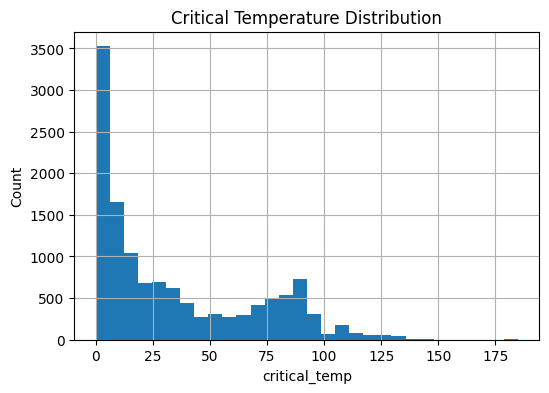

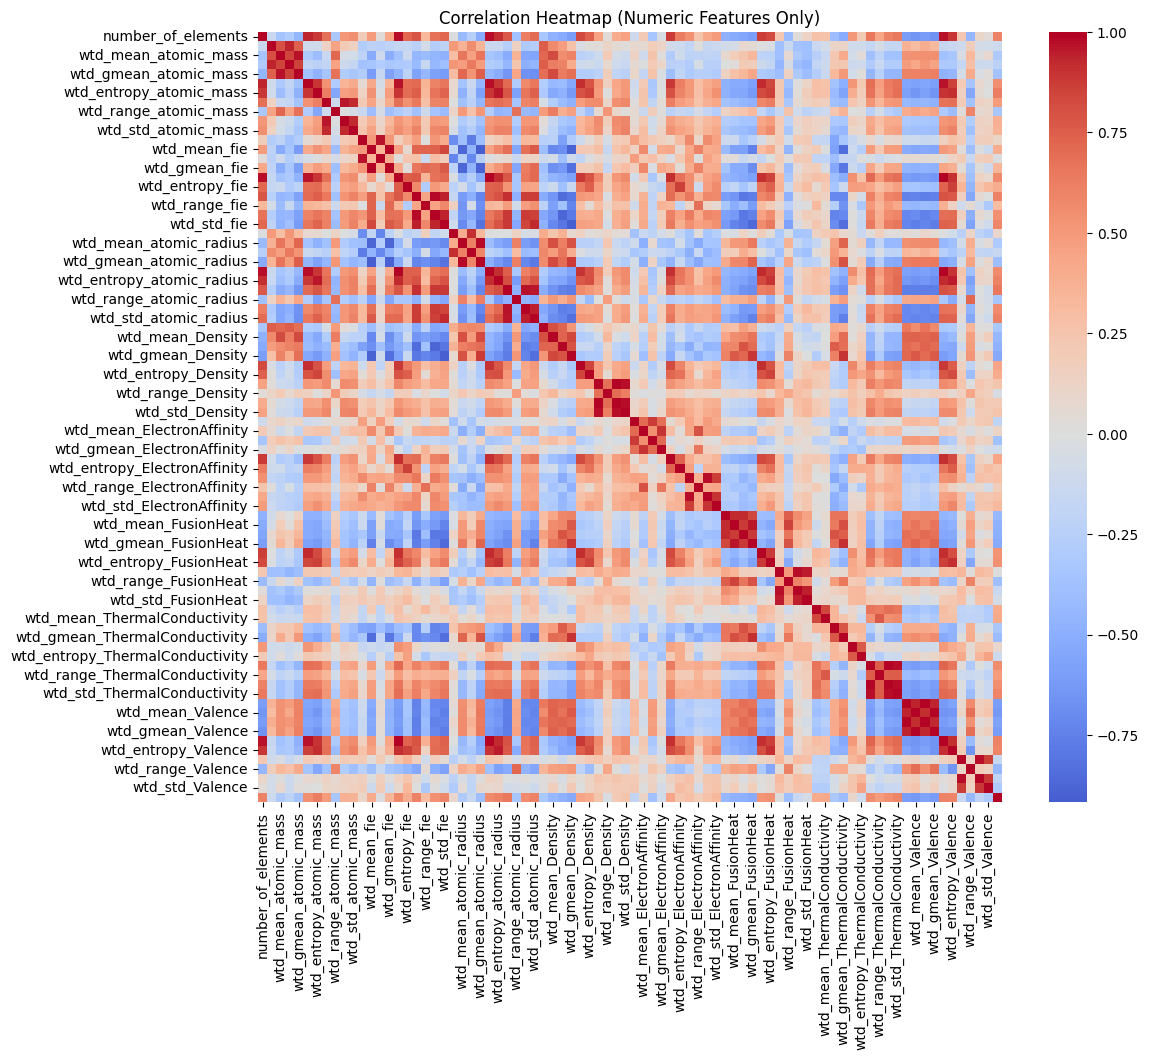

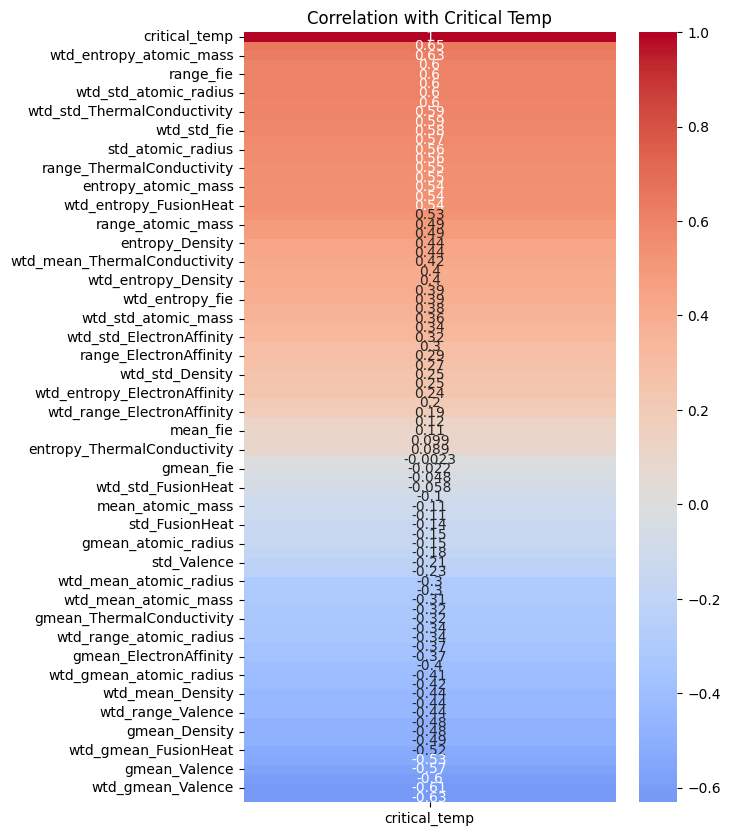

X_train shape: (12759, 82)
Y_train shape: (12759,)
X_test shape: (8504, 82)
X_train columns: ['ID', 'number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass'] ...


In [8]:
# === 데이터 분석 & 전처리 (critical_temp = Y, 나머지 = X) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기 (train / test)
train_url = "https://raw.githubusercontent.com/AI-Lab-2025-2-3rd/ai-project-myth/refs/heads/main/train.csv"
test_url  = "https://raw.githubusercontent.com/AI-Lab-2025-2-3rd/ai-project-myth/refs/heads/main/test.csv"

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

# 2. 불필요한 ID 컬럼 제거
for df in [train, test]:
    if 'id' in df.columns:
        df.drop(columns=['id'], inplace=True)

# 3. 데이터 기본 구조 확인
print("=== Train 데이터 구조 ===")
print(train.info(), "\n")

print("=== Train 결측치 확인 ===")
print(train.isnull().sum(), "\n")

print("=== Train 기술 통계량 ===")
print(train.describe(), "\n")

# 4. 타깃 분포 확인 (critical_temp)
plt.figure(figsize=(6,4))
train['critical_temp'].hist(bins=30)
plt.title("Critical Temperature Distribution")
plt.xlabel("critical_temp")
plt.ylabel("Count")
plt.show()

# 5. 수치형 변수 상관관계 (문자열 제외)
num_train = train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
sns.heatmap(num_train.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# 5-1. critical_temp와 피처들 간의 상관관계만 표시
corr_with_target = num_train.corr()['critical_temp'].sort_values(ascending=False)
plt.figure(figsize=(6,10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation with Critical Temp")
plt.show()

# 6. 전처리
## (1) 결측치 처리: 수치형 → 평균 대체, 범주형 → 최빈값 대체
for df in [train, test]:
    for col in df.columns:
        if df[col].dtype != "object":
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

# 7. X, Y 분리 (train / test)
X_train = train.drop(columns=['critical_temp'])
Y_train = train['critical_temp']
X_test  = test.copy()

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("X_train columns:", X_train.columns.tolist()[:10], "...")


In [9]:
from sklearn.model_selection import train_test_split

# Train 데이터를 다시 학습/검증 세트로 나눔 (예: 80:20)
X_train_split, X_valid, Y_train_split, Y_valid = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42
)

print("X_train_split shape:", X_train_split.shape)
print("Y_train_split shape:", Y_train_split.shape)
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)


X_train_split shape: (10207, 82)
Y_train_split shape: (10207,)
X_valid shape: (2552, 82)
Y_valid shape: (2552,)
